In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def mostra_img(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18, 6)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

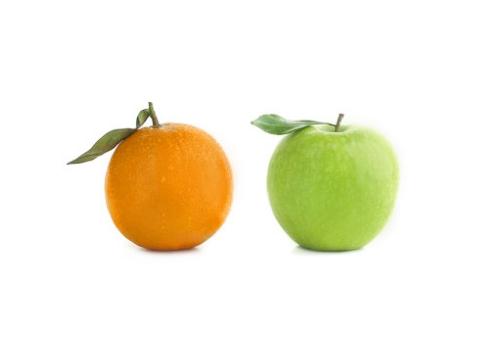

(334, 500, 3)


In [3]:
img = cv2.imread('frutas.jpg')
mostra_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(img.shape)

In [4]:
vetorizado = img.reshape((-1, 3))
vetorizado.shape

(167000, 3)

In [6]:
vetorizado = np.float32(vetorizado)

In [7]:
parada = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [8]:
ret, label, centros = cv2.kmeans(vetorizado, 3, None, parada, 10, cv2.KMEANS_RANDOM_CENTERS)

In [9]:
print(ret)

66691163.58572686


In [10]:
print(label)

[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]


In [11]:
print(centros)

[[ 14.406983 133.79312  225.93048 ]
 [ 84.77781  190.10513  166.05893 ]
 [254.4694   255.06332  255.06282 ]]


In [12]:
centros = np.uint8(centros)
print(centros)

[[ 14 133 225]
 [ 84 190 166]
 [254 255 255]]


In [13]:
img_final = centros[label.flatten()]

In [14]:
img_final

array([[254, 255, 255],
       [254, 255, 255],
       [254, 255, 255],
       ...,
       [254, 255, 255],
       [254, 255, 255],
       [254, 255, 255]], dtype=uint8)

In [15]:
img_final = img_final.reshape(img.shape)
print(img_final)

[[[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [254 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [254 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [254 255 255]]

 ...

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [254 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [254 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [254 255 255]]]


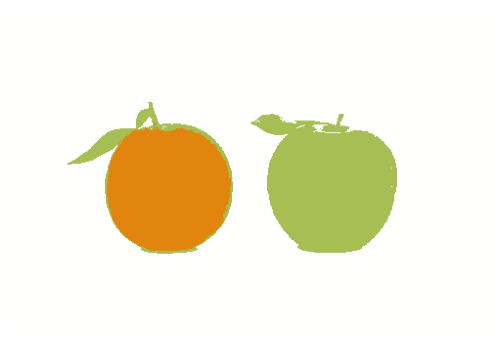

In [17]:
mostra_img(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))

In [22]:
def segmentacao_cluster(img, k):
  vetorizado = np.float32(img).reshape(-1, 3)
  criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
  ret, label, centros = cv2.kmeans(vetorizado, k, None, criterio, 10, cv2.KMEANS_RANDOM_CENTERS)
  centros = np.uint8(centros)
  img_final = centros[label.flatten()]
  img_final = img_final.reshape(img.shape)
  return img_final

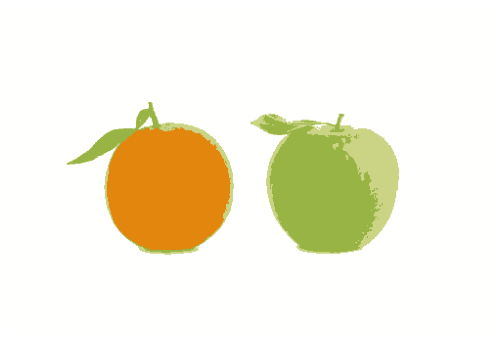

In [27]:
seg_cluster = segmentacao_cluster(img, 4)
mostra_img(seg_cluster)

In [29]:
def segmentacao_clustering(img):
  titulos = ['Imagem Original']
  imagens = [img]

  segmentacoes = 6

  for k in range(2, segmentacoes + 1):
    titulo = 'k = ' + str(k)
    titulos.append(titulo)
    seg= segmentacao_cluster(img, k)
    imagens.append(seg)

  fig = plt.gcf()
  fig.set_size_inches(18,12)
  for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])
  
  plt.subplots_adjust(wspace=0.05)
  plt.show()

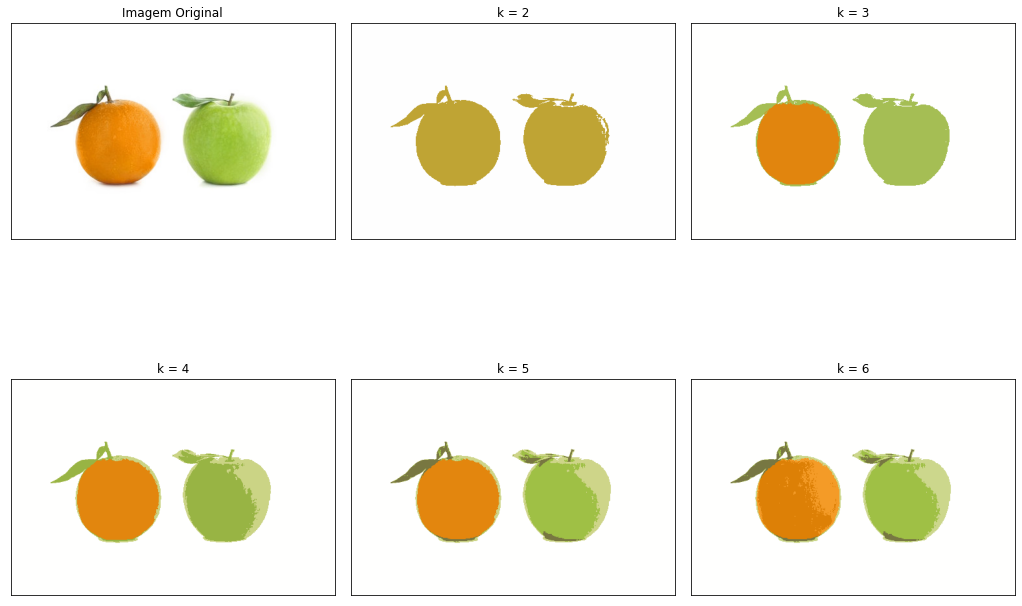

In [30]:
segmentacao_clustering(img)

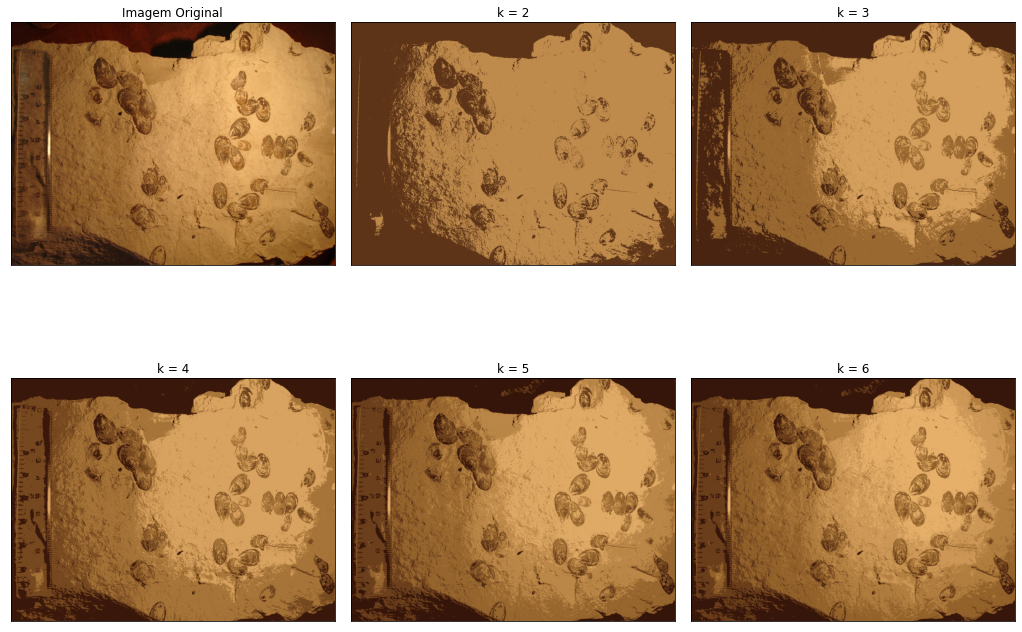

In [31]:
img = cv2.imread('/content/DSC01713.JPG')
segmentacao_clustering(img)

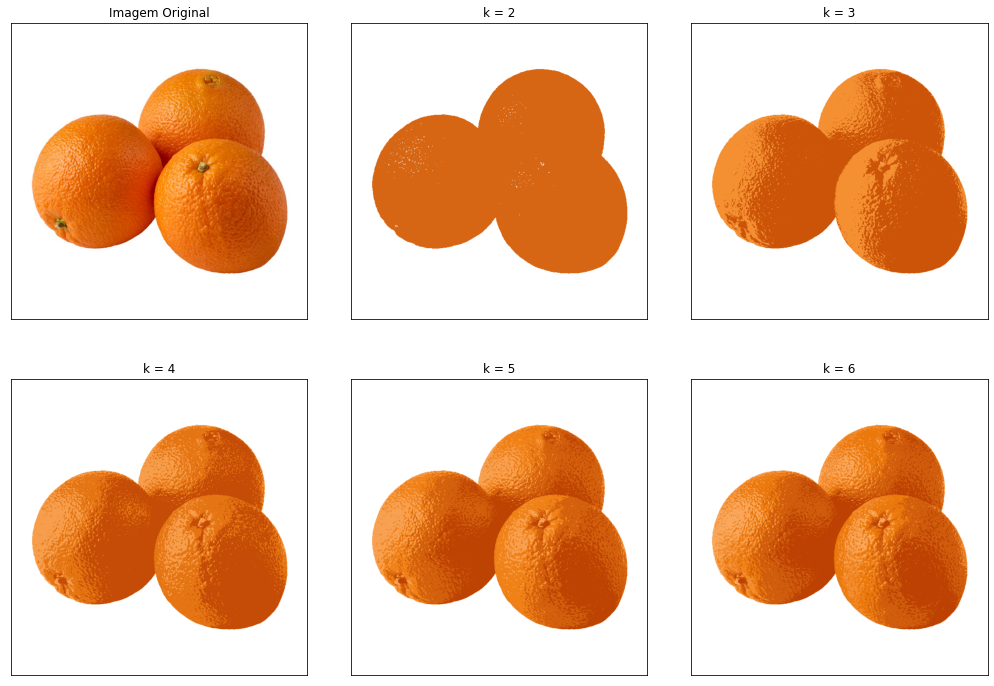

In [32]:
img = cv2.imread('/content/laranjas.jpg')
segmentacao_clustering(img)

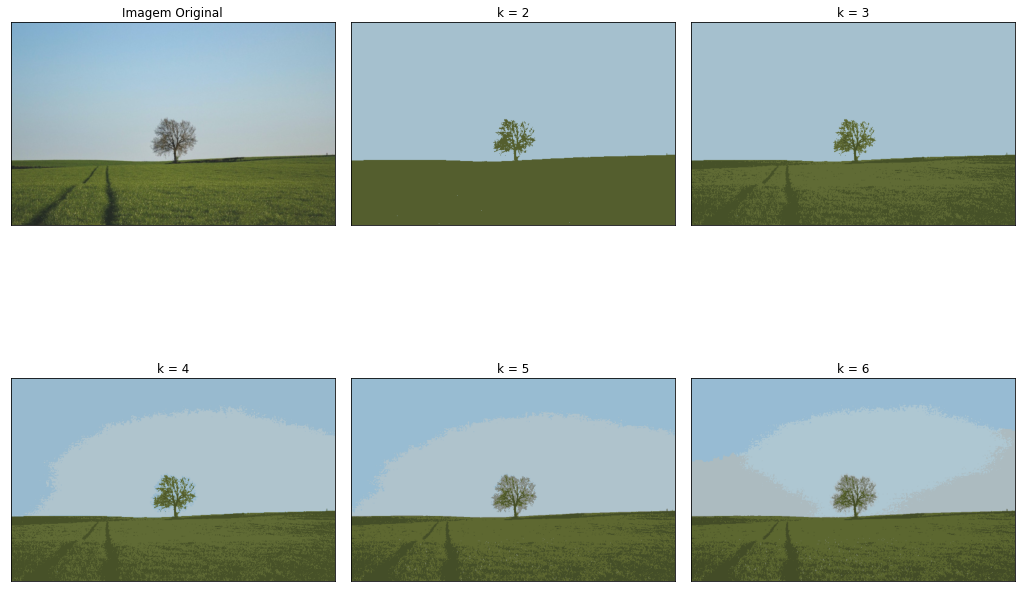

In [33]:
img = cv2.imread('/content/paisagem01.jpg')
segmentacao_clustering(img)

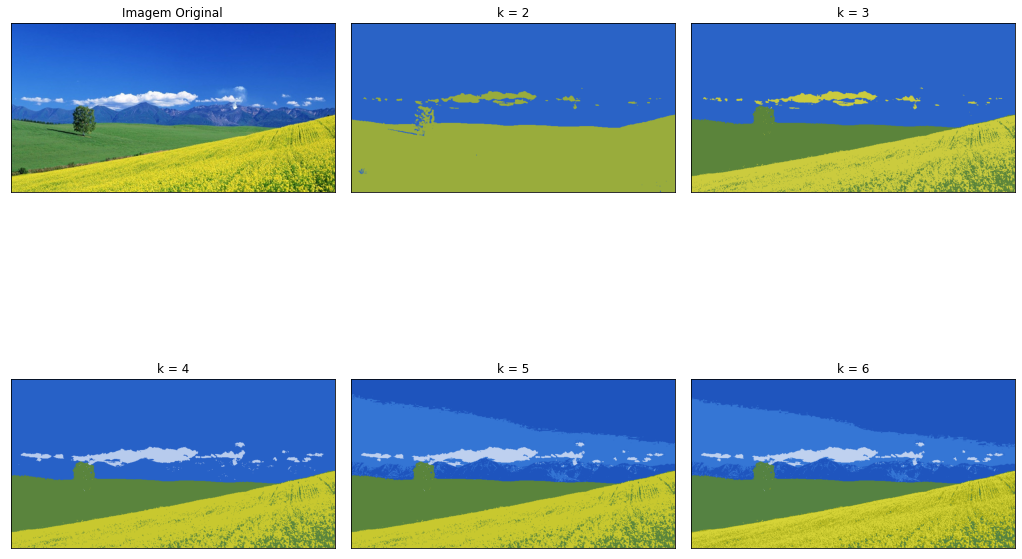

In [34]:
img = cv2.imread('/content/paisagem02.jpg')
segmentacao_clustering(img)

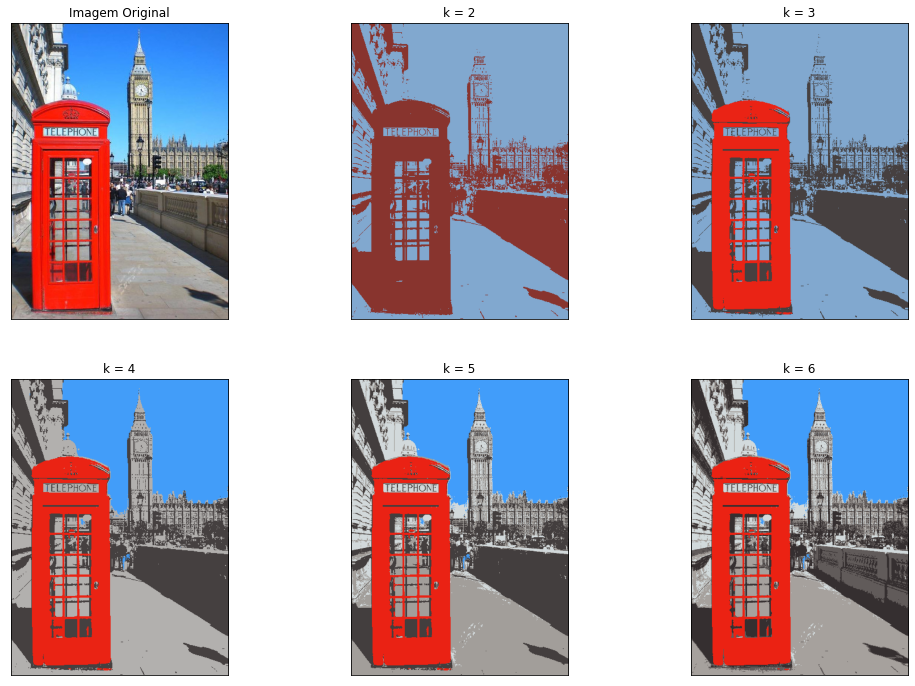

In [35]:
img = cv2.imread('/content/london-red-phonebox.jpg')
segmentacao_clustering(img)